Measurement counts: {'11': 1024}


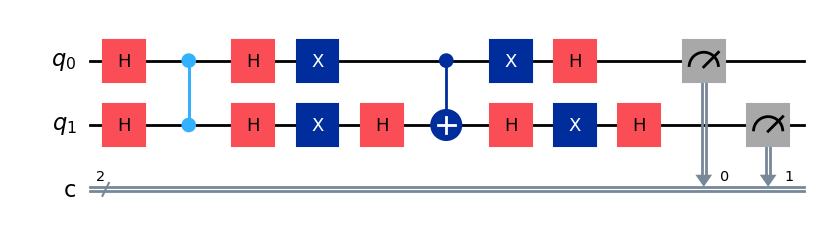

In [5]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Step 1: Create a 2-qubit circuit with 2 classical bits
qc = QuantumCircuit(2, 2)

# Step 2: Apply Hadamard to both qubits
qc.h([0, 1])

# Step 3: Oracle to mark |11>
qc.cz(0, 1)

# Step 4: Diffuser (inversion about the mean)
qc.h([0, 1])
qc.x([0, 1])
qc.h(1)
qc.cx(0, 1)
qc.h(1)
qc.x([0, 1])
qc.h([0, 1])

# Step 5: Measurement
qc.measure([0, 1], [0, 1])

# Step 6: Simulate using AerSimulator directly (NO `execute`)
simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Step 7: Display results
print("Measurement counts:", counts)
plot_histogram(counts)
plt.show()
qc.draw('mpl')

